In [1]:
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


def add_next_part(df, next_part):
    return pd.concat([df, next_part], ignore_index=True)

def replace_commas_and_convert_to_float(value):
    return float(value.replace(',', '.'))

feature = 'Отделка'

flats_df = pd.read_excel('../cian_spb.xlsx')
flats_df = flats_df.loc[:, [feature, "Общая площадь", "Жилая площадь", "Площадь кухни", "Стоимость"]]
flats_df.dropna(inplace=True)
numeric_columns = ["Общая площадь", "Жилая площадь", "Площадь кухни"]
flats_df[numeric_columns] = flats_df[numeric_columns].map(replace_commas_and_convert_to_float)
flats_df = flats_df.sample(frac=1)
flats_df

,Отделка,Общая площадь,Жилая площадь,Площадь кухни,Стоимость
994,Чистовая,20.32,9.2,5.0,3495040
141,Чистовая,35.50,11.8,11.3,6192993
1344,Без отделки,34.39,10.0,14.6,5416425
683,Чистовая,40.19,17.6,12.5,12044115
58,Черновая,29.40,13.9,5.9,5890308
...,...,...,...,...,...
662,Чистовая,34.51,11.5,14.3,5600000
1098,Без отделки,30.42,11.4,11.2,4441320
788,Без отделки,38.20,12.8,12.7,15986700
123,Без отделки,27.20,17.2,5.0,6126981


In [2]:
import numpy as np

df = flats_df
df

,Отделка,Общая площадь,Жилая площадь,Площадь кухни,Стоимость
438,Чистовая,37.5,16.9,9.4,7049954
841,Без отделки,56.4,14.0,21.3,21000000
432,Чистовая,35.9,14.4,10.7,7004430
984,Чистовая,24.6,11.9,5.0,3431700
175,Черновая,39.8,15.1,14.6,6265503
...,...,...,...,...,...
989,Чистовая,21.1,9.9,5.4,3441410
684,Чистовая,26.9,14.5,4.0,7700000
630,Черновая,45.6,20.7,12.1,14850324
64,С отделкой,21.9,10.0,5.3,5899860


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X = scaler.fit_transform(df.drop(columns=[feature]))
y = df[feature]


X_train, X_test, y_train, y_test = train_test_split(X, y.to_numpy(), test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)
y_valid

array(['Без отделки', 'Чистовая', 'Без отделки', 'Предчистовая',
       'Предчистовая', 'Черновая', 'Чистовая', 'Чистовая', 'Без отделки',
       'Без отделки', 'Чистовая', 'Без отделки', 'Чистовая', 'Чистовая',
       'Чистовая', 'Чистовая', 'Неизвестно', 'Без отделки', 'Черновая',
       'Чистовая', 'Черновая', 'Чистовая', 'Без отделки', 'Чистовая',
       'Чистовая', 'Чистовая', 'Чистовая', 'Чистовая', 'Без отделки',
       'Чистовая', 'Без отделки', 'Чистовая', 'Неизвестно', 'Чистовая',
       'Чистовая', 'Чистовая', 'Без отделки', 'Черновая', 'Чистовая',
       'Чистовая', 'Черновая', 'Чистовая', 'Без отделки', 'Чистовая',
       'Чистовая', 'Чистовая', 'Неизвестно', 'Чистовая', 'Без отделки',
       'Чистовая', 'Чистовая', 'Чистовая', 'Черновая', 'Чистовая',
       'Чистовая', 'Чистовая', 'Без отделки', 'Чистовая', 'Чистовая',
       'Чистовая', 'С отделкой', 'Без отделки', 'Чистовая',
       'Предчистовая', 'Чистовая', 'Без отделки', 'Чистовая',
       'С отделкой', 'Черновая', 

In [4]:
def transform_labels(y):
    return np.where(y == 'Без отделки', 1, -1)
y_bin_train = transform_labels(y_train)
y_bin_valid = transform_labels(y_valid)
y_bin_test = transform_labels(y_test)
y_bin_valid

array([ 1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1,
       -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,
        1, -1, -1,  1, -1])

In [32]:
df

,Отделка,Общая площадь,Жилая площадь,Площадь кухни,Стоимость
438,Чистовая,37.5,16.9,9.4,7049954
841,Без отделки,56.4,14.0,21.3,21000000
432,Чистовая,35.9,14.4,10.7,7004430
984,Чистовая,24.6,11.9,5.0,3431700
175,Черновая,39.8,15.1,14.6,6265503
...,...,...,...,...,...
989,Чистовая,21.1,9.9,5.4,3441410
684,Чистовая,26.9,14.5,4.0,7700000
630,Черновая,45.6,20.7,12.1,14850324
64,С отделкой,21.9,10.0,5.3,5899860


In [5]:
y_bin_test

array([-1, -1, -1,  1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1,
        1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1,
        1, -1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
       -1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1,  1,
       -1, -1,  1,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1,  1, -1,
       -1])

In [6]:
class Node:
    def __init__(self, l=None, r=None, val=None):
        self.l = l
        self.r = r
        self.val = val
    
    def is_leaf(self):
        return self.l is None and self.r is None

In [7]:
import numpy as np
from collections import Counter

class DecisionTree:
    def __init__(self, max_depth=None, min_objects_in_leaf=1, feat_size=None, min_gain=-1):
        self.max_depth = max_depth
        self.min_objects_in_leaf = min_objects_in_leaf
        self.feat_size = feat_size
        self.min_gain = min_gain
        
    def fit(self, X, y, sample_weights=None):
        if sample_weights is None:
            sample_weights = np.ones(len(y)) / len(y)
        self.tree = self.build_tree(X, y, sample_weights)
    
    def build_tree(self, X, y, sample_weights, depth=0):
        if depth == self.max_depth or len(np.unique(y)) == 1 or len(y) <= self.min_objects_in_leaf:
            cat = self.most_common_leaf_category(y, sample_weights)
            return Node(val=cat)
        
        _, n_feat = X.shape
        if self.feat_size is None:
            features = np.arange(n_feat)
        else:
            features = np.random.choice(n_feat, self.feat_size, replace=False)
        
        best_split, split_value, gain = self.best_feature_split(X, y, features, sample_weights)
        if gain < self.min_gain or best_split is None:
            cat = self.most_common_leaf_category(y, sample_weights)
            return Node(val=cat)
        
        l_part, r_part = self.split(X[:, best_split], split_value)
        l_tree = self.build_tree(X[l_part], y[l_part], sample_weights[l_part], depth + 1)
        r_tree = self.build_tree(X[r_part], y[r_part], sample_weights[r_part], depth + 1)
        return Node(l=l_tree, r=r_tree, val=(best_split, split_value))
    
    def best_feature_split(self, X, y, chosen_features, sample_weights):
        best_gain = -1
        split_feature, split_value = None, None
        
        for feature in chosen_features:
            column = X[:, feature]
            values = np.unique(column)
            for value in values:
                gain = self.gain_count(y, column, value, sample_weights)
                if gain > best_gain:
                    best_gain = gain
                    split_feature = feature
                    split_value = value  
        return split_feature, split_value, best_gain
    
    def gain_count(self, y, split_column, split_value, sample_weights):
        parent_e = self.weighted_entropy(y, sample_weights)
        left_part, right_part = self.split(split_column, split_value)
        if len(left_part) == 0 or len(right_part) == 0:
            return 0
        n = len(y)
        n_left, n_right = np.sum(sample_weights[left_part]), np.sum(sample_weights[right_part])
        e_left, e_right = self.weighted_entropy(y[left_part], sample_weights[left_part]), self.weighted_entropy(y[right_part], sample_weights[right_part])
        child_e = (n_left / np.sum(sample_weights)) * e_left + (n_right / np.sum(sample_weights)) * e_right
        del_e = parent_e - child_e
        return del_e
    
    def weighted_entropy(self, y, sample_weights):
        unique_vals = np.unique(y)
        weighted_counts = np.zeros(len(unique_vals))
        for i, val in enumerate(unique_vals):
            weighted_counts[i] = np.sum(sample_weights[y == val])
        ps = weighted_counts / np.sum(sample_weights)
        return -np.sum([p * np.log2(p) for p in ps if p > 0])
    
    def split(self, split_column, split_value):
        l_part = np.argwhere(split_column <= split_value).flatten()
        r_part = np.argwhere(split_column > split_value).flatten()
        return l_part, r_part
    
    def most_common_leaf_category(self, y, sample_weights):
        counter = Counter()
        for label, weight in zip(y, sample_weights):
            counter[label] += weight
        return counter.most_common(1)[0][0]
    
    def predict(self, X):
        return np.array([self.predict_one(inputs, self.tree) for inputs in X])
    
    def predict_one(self, x, node):
        if node.is_leaf():
            return node.val
        feature, value = node.val
        if x[feature] <= value:
            return self.predict_one(x, node.l)
        else:
            return self.predict_one(x, node.r)


In [8]:
tree = DecisionTree(max_depth=5)
tree.fit(X_train, y_train)

predictions = tree.predict(X_test)

accuracy = np.mean(predictions == y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.59


In [9]:
class AdaBoost:
    def __init__(self, n_estimators=50, max_depth=None, min_objects_in_leaf=1, feat_size=None, min_gain=-1):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_objects_in_leaf = min_objects_in_leaf
        self.min_gain = min_gain
        self.feat_size = feat_size
        self.estimators = []
        self.alphas = []
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        sample_weights = np.ones(n_samples) / n_samples
        
        for _ in range(self.n_estimators):
            tree = DecisionTree(max_depth=self.max_depth, min_objects_in_leaf=self.min_objects_in_leaf, feat_size=self.feat_size, min_gain=self.min_gain)
            tree.fit(X, y, sample_weights)
            predictions = tree.predict(X)
            
            missclassified = predictions != y
            err = np.sum(sample_weights * missclassified) / np.sum(sample_weights)
            alpha = 0.5 * np.log((1 - err) / err)
            
            sample_weights *= np.exp(-alpha * y * predictions)
            sample_weights /= np.sum(sample_weights)
            
            self.estimators.append(tree)
            self.alphas.append(alpha)
    
    def predict(self, X):
        final_predictions = np.zeros(X.shape[0])
        for alpha, estimator in zip(self.alphas, self.estimators):
            final_predictions += alpha * estimator.predict(X)
        return np.sign(final_predictions)

In [10]:

boost = AdaBoost(n_estimators=10, max_depth=3)
boost.fit(X_train, y_bin_train)

predictions_boost = boost.predict(X_test)
accuracy = np.mean(predictions_boost == y_bin_test)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.73


In [11]:
class RandomForest:
    def __init__(self, n_estimators=50, max_depth=None, min_objects_in_leaf=1, feat_size=None,  min_gain=-1):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_objects_in_leaf = min_objects_in_leaf
        self.feat_size = feat_size
        self.min_gain = min_gain
        self.trees = []
    
    def fit(self, X, y):
        for _ in range(self.n_estimators):
            tree = DecisionTree(max_depth=self.max_depth, min_objects_in_leaf=self.min_objects_in_leaf, feat_size=self.feat_size, min_gain=self.min_gain)
            tree.fit(X, y)
            self.trees.append(tree)
    
    def predict(self, X):
        tree_predictions = np.array([tree.predict(X) for tree in self.trees])
        most_common = [Counter(tree_predictions[:, i]).most_common(1)[0][0] for i in range(X.shape[0])]
        return np.array(most_common)

In [12]:
forest = RandomForest(n_estimators=10, max_depth=6, feat_size=3)
forest.fit(X_train, y_train)

predictions_forest = forest.predict(X_test)
accuracy = np.mean(predictions_boost == y_bin_test)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.73


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

min_leaf_values = [1, 2, 4, 8, 16, 32, 62, 128]
min_gains = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2]

def evaluate_tree_depth(X_train, y_train, min_leaf_values, min_gains):
    depths = []
    for min_leaf_value in min_leaf_values:
        for min_gain in min_gains:
            clf = DecisionTreeClassifier(min_samples_leaf=min_leaf_value, min_impurity_decrease=min_gain)
            clf.fit(X_train, y_train)
            depths.append((min_leaf_value, min_gain, clf.get_depth()))
    return depths


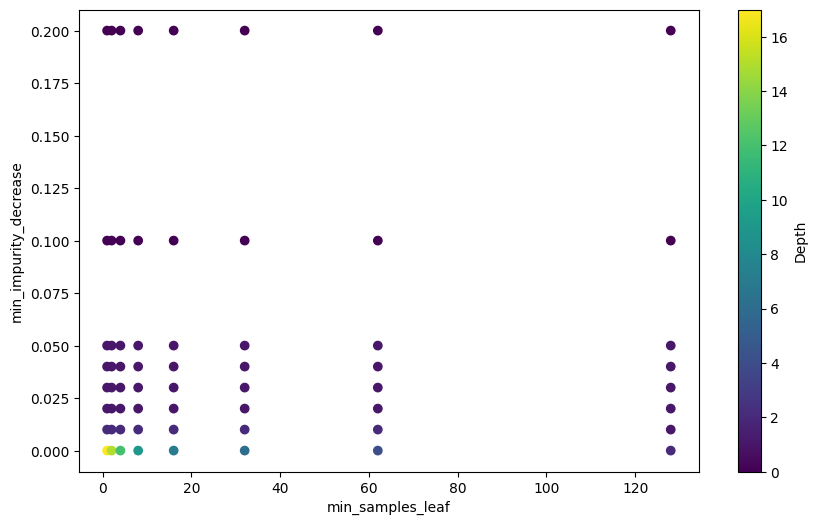

In [14]:
import matplotlib.pyplot as plt

depths = evaluate_tree_depth(X_train, y_train, min_leaf_values, min_gains)

min_samples_leaf = [item[0] for item in depths]
min_impurity_decrease = [item[1] for item in depths]
depth = [item[2] for item in depths]

plt.figure(figsize=(10, 6))
plt.scatter(min_samples_leaf, min_impurity_decrease, c=depth, cmap='viridis')
plt.colorbar(label='Depth') 

plt.xlabel('min_samples_leaf')
plt.ylabel('min_impurity_decrease')
plt.show()

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'min_samples_leaf': min_leaf_values,
    'min_impurity_decrease': min_gains,
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f'Best Parameters for library model: {best_params}, \n Best Accuracy for library model: {best_score:.2f} \n')

Best Parameters for library model: {'min_impurity_decrease': 0.0, 'min_samples_leaf': 128}, 
 Best Accuracy for library model: 0.55 



In [16]:
best_accuracy = 0
best_gain = 0
best_leaf_value = 0
for min_gain in min_gains:
    for min_leaf_value in min_leaf_values:
        tree = DecisionTree(min_gain=min_gain, min_objects_in_leaf=min_leaf_value)
        tree.fit(X_train, y_train)
        predictions = tree.predict(X_test)
        accuracy = np.mean(predictions == y_test)
        if (accuracy > best_accuracy):
            best_accuracy = accuracy
            best_gain = min_gain
            best_leaf_value = min_leaf_value
print(f'Best Parameters for my model: min_gain {best_gain}, min_objects_in_leaf {best_leaf_value}\n Best Accuracy for my model: {best_accuracy:.2f} \n')

Best Parameters for my model: min_gain 0.0, min_objects_in_leaf 62
 Best Accuracy for my model: 0.60 



In [17]:
train_lib_errors = []
test_lib_errors = []

for depth in range(1, 10):
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)
    train_lib_errors.append(1 - accuracy_score(y_train, clf.predict(X_train)))
    test_lib_errors.append(1 - accuracy_score(y_test, clf.predict(X_test)))

In [18]:
train_my_errors = []
test_my_errors = []

for depth in range(1, 10):
    print(f'Now working with depth - {depth}')
    tree = DecisionTree(max_depth=depth)
    tree.fit(X_train, y_train)
    predictions_train = tree.predict(X_train)
    accuracy = np.mean(predictions_train == y_train)
    train_my_errors.append(1 - accuracy)
    predictions_test = tree.predict(X_test)
    accuracy = np.mean(predictions_test == y_test)
    test_my_errors.append(1 - accuracy)

Now working with depth - 1
Now working with depth - 2
Now working with depth - 3
Now working with depth - 4
Now working with depth - 5
Now working with depth - 6
Now working with depth - 7
Now working with depth - 8
Now working with depth - 9


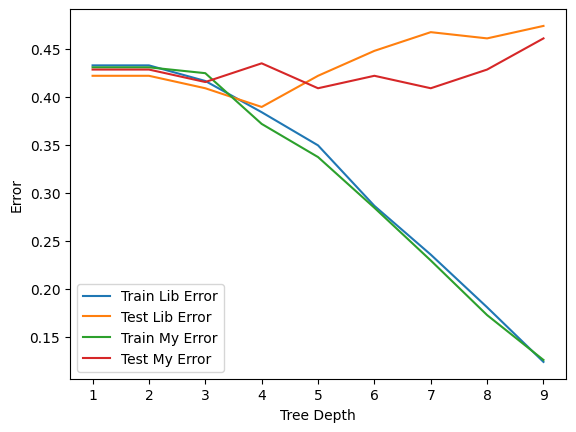

In [19]:
plt.plot(range(1, 10), train_lib_errors, label='Train Lib Error')
plt.plot(range(1, 10), test_lib_errors, label='Test Lib Error')
plt.plot(range(1, 10), train_my_errors, label='Train My Error')
plt.plot(range(1, 10), test_my_errors, label='Test My Error')
plt.xlabel('Tree Depth')
plt.ylabel('Error')
plt.legend()
plt.show()

In [20]:
min_leaf_values = [2]
min_gains = [0.0, 0.01]
depths = [3, 4, 5]
trees_num = [10, 15, 20, 30]
from sklearn.ensemble import AdaBoostClassifier

param_grid_ada = {
    'n_estimators': trees_num,
    'estimator__max_depth': depths,
    'estimator__min_samples_leaf': min_leaf_values,
    'estimator__min_impurity_decrease': min_gains,
}
grid_search_ada = GridSearchCV(AdaBoostClassifier(estimator=DecisionTreeClassifier()), param_grid_ada, cv=5)
grid_search_ada.fit(X_train, y_bin_train)
best_params_ada = grid_search_ada.best_params_
print(f'Best parameters for AdaBoostClassifier: {best_params_ada}')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R

Best parameters for AdaBoostClassifier: {'estimator__max_depth': 5, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 2, 'n_estimators': 20}


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R

In [21]:
from sklearn.ensemble import RandomForestClassifier

param_grid_ada = {
    'n_estimators': trees_num,
    'max_depth': depths,
    'min_samples_leaf': min_leaf_values,
    'min_impurity_decrease': min_gains,
}
grid_search_ada = GridSearchCV(RandomForestClassifier(), param_grid_ada, cv=5)
grid_search_ada.fit(X_train, y_train)
best_params_ada = grid_search_ada.best_params_
print(f'Best parameters for RandomForestClassifier: {best_params_ada}')

Best parameters for RandomForestClassifier: {'max_depth': 5, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'n_estimators': 10}


In [22]:
train_ada_lib_errors = []
test_ada_lib_errors = []
estimator = DecisionTreeClassifier(min_samples_leaf=2, min_impurity_decrease=0.01, max_depth=5)

for n in range(10, 50, 5):
    clf = AdaBoostClassifier(estimator=estimator, n_estimators=n)
    clf.fit(X_train, y_bin_train)
    train_ada_lib_errors.append(1 - accuracy_score(y_bin_train, clf.predict(X_train)))
    test_ada_lib_errors.append(1 - accuracy_score(y_bin_test, clf.predict(X_test)))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R

In [23]:
train_rf_lib_errors = []
test_rf_lib_errors = []

for n in range(10, 50, 5):
    clf = RandomForestClassifier(n_estimators=n, min_samples_leaf=2, min_impurity_decrease=0, max_depth=5)
    clf.fit(X_train, y_train)
    train_rf_lib_errors.append(1 - accuracy_score(y_train, clf.predict(X_train)))
    test_rf_lib_errors.append(1 - accuracy_score(y_test, clf.predict(X_test)))

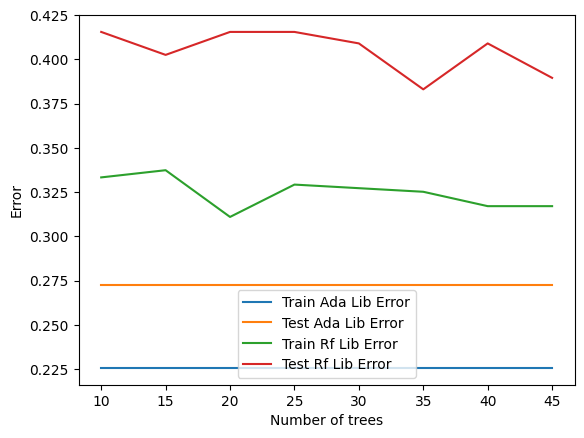

In [24]:
plt.plot(range(10, 50, 5), train_ada_lib_errors, label='Train Ada Lib Error')
plt.plot(range(10, 50, 5), test_ada_lib_errors, label='Test Ada Lib Error')
plt.plot(range(10, 50, 5), train_rf_lib_errors, label='Train Rf Lib Error')
plt.plot(range(10, 50, 5), test_rf_lib_errors, label='Test Rf Lib Error')
plt.xlabel('Number of trees')
plt.ylabel('Error')
plt.legend()
plt.show()

In [25]:
min_leaf_values = [2]
min_gains = [0, 0.01]
depths = [3, 4]
trees_nums = [10, 20, 30]

best_accuracy, best_gain, best_depth, best_n = 0, 0, 0, 0
for min_gain in min_gains:
    for min_leaf_value in min_leaf_values:
        for depth in depths:
            for num in trees_nums:
                boost = AdaBoost(min_gain=min_gain, min_objects_in_leaf=min_leaf_value, n_estimators=num, max_depth=depth)
                boost.fit(X_train, y_bin_train)
                predictions = boost.predict(X_test)
                accuracy = np.mean(predictions == y_bin_test)
                if accuracy > best_accuracy:
                    best_depth = depth
                    best_n = num
                    best_accuracy = accuracy
                    best_gain = min_gain
                    best_leaf_value = min_leaf_value
print(f'Best Parameters for my model: min_gain {best_gain}, min_objects_in_leaf {best_leaf_value}, max_depth {best_depth}, num of trees {best_n}\n Best Accuracy for my model: {best_accuracy:.2f} \n')

Best Parameters for my model: min_gain 0, min_objects_in_leaf 2, max_depth 4, num of trees 10
 Best Accuracy for my model: 0.77 



In [26]:
min_leaf_values = [2]
min_gains = [0]
depths = [3]
trees_nums = [30]
samples = [3]

best_sample, best_accuracy, best_gain, best_depth, best_n = 0, 0, 0, 0,0
for i in samples:
    for min_leaf_value in min_leaf_values:
        for depth in depths:
            for num in trees_nums:
                forest = RandomForest(min_gain=0, min_objects_in_leaf=min_leaf_value, n_estimators=num, max_depth=depth, feat_size=i)
                forest.fit(X_train, y_train)
                predictions = forest.predict(X_test)
                accuracy = np.mean(predictions == y_test)
                if accuracy > best_accuracy:
                    best_depth = depth
                    best_n = num
                    best_accuracy = accuracy
                    best_gain = min_gain
                    best_leaf_value = min_leaf_value
                    best_sample = i
print(f'Best Parameters for my model: min_gain {best_gain}, min_objects_in_leaf {best_leaf_value}, max_depth {best_depth}, num of trees {best_n}\n Best Accuracy for my model: {best_accuracy:.2f} \n')

Best Parameters for my model: min_gain 0.01, min_objects_in_leaf 2, max_depth 3, num of trees 30
 Best Accuracy for my model: 0.58 



In [27]:
train_ada_my_errors = []
test_ada_my_errors = []

for i in range(10, 50, 5):
    print("Now testing:", i)
    boost = AdaBoost(n_estimators=i, max_depth=3, min_objects_in_leaf=2)
    boost.fit(X_train, y_bin_train)
    predictions_test_boost = boost.predict(X_test)
    accuracy_test = np.mean(predictions_test_boost == y_bin_test)

    predictions_train_boost = boost.predict(X_train)
    accuracy_train = np.mean(predictions_train_boost == y_bin_train)
    train_ada_my_errors.append(1 - accuracy_train)
    test_ada_my_errors.append(1 - accuracy_test)


Now testing: 10
Now testing: 15
Now testing: 20
Now testing: 25
Now testing: 30
Now testing: 35
Now testing: 40
Now testing: 45


In [28]:
train_rf_my_errors = []
test_rf_my_errors = []

for i in range(10, 50, 5):
    print("Now testing:", i)
    forest = RandomForest(n_estimators=i, max_depth=5, min_objects_in_leaf=2, feat_size=3)
    forest.fit(X_train, y_train)
    predictions_test_forest = forest.predict(X_test)
    accuracy_test = np.mean(predictions_test_forest == y_test)

    predictions_train_forest = forest.predict(X_train)
    accuracy_train = np.mean(predictions_train_forest == y_train)
    train_ada_my_errors.append(1 - accuracy_train)
    test_ada_my_errors.append(1 - accuracy_test)

Now testing: 10
Now testing: 15
Now testing: 20
Now testing: 25
Now testing: 30
Now testing: 35
Now testing: 40
Now testing: 45


In [29]:
train_rf_my_errors = train_ada_my_errors[8:]
test_rf_my_errors = test_ada_my_errors[8:]
train_rf_my_errors

[np.float64(0.3455284552845529),
 np.float64(0.3455284552845529),
 np.float64(0.35162601626016265),
 np.float64(0.3414634146341463),
 np.float64(0.3414634146341463),
 np.float64(0.33739837398373984),
 np.float64(0.3475609756097561),
 np.float64(0.35365853658536583)]

In [30]:
train_ada_my_errors = train_ada_my_errors[:8]
test_ada_my_errors = test_ada_my_errors[:8]
test_ada_my_errors

[np.float64(0.2727272727272727),
 np.float64(0.24675324675324672),
 np.float64(0.24025974025974028),
 np.float64(0.2532467532467533),
 np.float64(0.2597402597402597),
 np.float64(0.26623376623376627),
 np.float64(0.2532467532467533),
 np.float64(0.26623376623376627)]

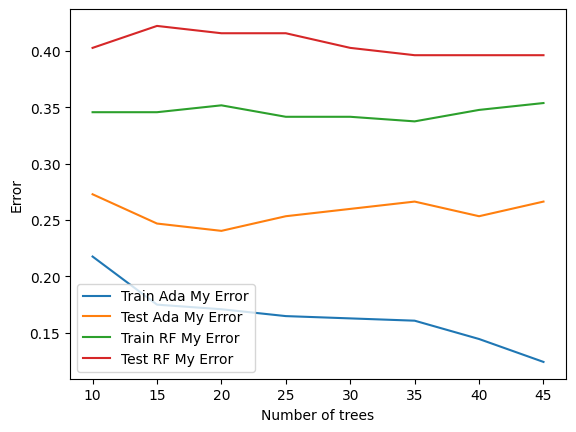

In [31]:
plt.plot(range(10, 50, 5), train_ada_my_errors, label='Train Ada My Error')
plt.plot(range(10, 50, 5), test_ada_my_errors, label='Test Ada My Error')
plt.plot(range(10, 50, 5), train_rf_my_errors, label='Train RF My Error')
plt.plot(range(10, 50, 5), test_rf_my_errors, label='Test RF My Error')
plt.xlabel('Number of trees')
plt.ylabel('Error')
plt.legend()
plt.show()